# Implied volatility computation

2604.0656754818065


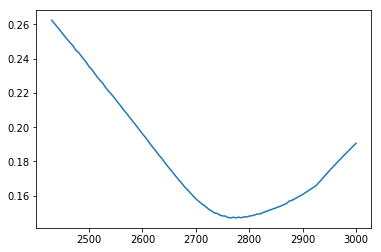

In [2]:
import json
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import newton
import matplotlib.pyplot as plt


# Underlying parameters
S0 = 2600
r = 0.01875
q = 0.018
T = 1/12


# Defining the Black-Scholes price as a function of the strike and volatility
def d1(sigma, K):
    return (np.log(S0/K)+(r-q+0.5*sigma**2)*T)/(sigma*np.sqrt(T))

def d2(sigma, K):
    return d1(sigma, K) - sigma*np.sqrt(T)

def price_BS(sigma, K):
    return S0*np.exp(-q*T)*norm.cdf(d1(sigma, K))-K*np.exp(-r*T)*norm.cdf(d2(sigma, K))

def zero_function(sigma, K, price):
    return price_BS(sigma, K) - price

# Retrieving option prices
option_prices = pd.read_json("S&P500.json")
option_prices = option_prices.set_index('strike')


# Retrieving the historical annualized volatility
hist_prices = pd.read_json("hist_S&P500.json",orient='records')
hist_prices = hist_prices.set_index('date')
hist_prices = hist_prices.pct_change()
hist_sigma = float(hist_prices.std())*np.sqrt(252)


# Computing implied volatility
strikes = option_prices.index
volatilities = np.zeros(len(strikes))

for i, strike in enumerate(strikes):
    price = float(option_prices.loc[[strike]]['price'])
    volatilities[i] = newton(zero_function,hist_sigma,args=(strike, price))

print(S0*np.exp(r*T))
plt.plot(strikes, volatilities)
plt.show()